In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.rc('text', usetex = True)
# matplotlib.rc('font', family = 'serif')
import cPickle as cp
import sys
sys.path.append("../../utils")
from misc_utils import expected_loss
import os
from copy import deepcopy
from plotting_performance_vs_metric import get_closeness, get_log_closeness, get_spectrum
from plotting_performance_vs_metric import get_measurement_metric, get_performance_metric, average_results_array, std_results_array
from plotting_performance_vs_metric import get_nystrom_memory_with_model, get_rff_memory_with_model, get_cir_rff_memory_with_model
from plotting_performance_vs_metric import get_results_for_one_precision, plot_figure, save_csv_with_error_bar
import math
from plot_utils import get_colors

### plot for fixed number of features with different regularizer values

In [2]:
def get_results_for_one_lambda(n_bit_list, general_folder_delta,
                                  folder_pattern, seeds=[1,]):
    delta_list_all = []
    for seed in seeds:
        delta_list = []
        for n_bit in n_bit_list:
            subfolder_name = deepcopy(folder_pattern)
            subfolder_name = subfolder_name.replace("nbit_unk", "nbit_" + str(n_bit) )
            subfolder_name = subfolder_name.replace("seed_unk", "seed_" + str(seed) )
            folder_name = general_folder_delta + "/" + subfolder_name
            file_name = "metric_sample_eval_py2.txt"
            if not os.path.isfile(folder_name + "/" + file_name):
                file_name = "metric_sample_eval.txt"
            metric_name = "Delta"
            delta = get_measurement_metric(folder_name, file_name, metric_name)
            delta_list.append(delta)
#             print subfolder_name
#         print "delta list ", delta_list            
        delta_list_all.append(np.array(deepcopy(delta_list) ) )
    return delta_list_all

In [3]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [4]:
# def average_results_array(results_array):
#     # average list of 1d np array results
# #     print results_array
#     print "check ", results_array
#     results_array = [np.reshape(x, x.size) for x in results_array]    
#     results = np.vstack(results_array)
# #     print results, results.shape
#     return np.mean(results, axis=0)

In [5]:
# def save_csv_with_error_bar(data_list, file_name="./test/test.csv", ave_x=False):
#     '''
#     data is a list of tuple (label, x_pt, y_pt), it is plotted using color named as label in the color_dict.
#     x_pt is a 1d list, y_pt is list of list, each inner list is from a random seed.
#     '''
#     df_list = []
    
#     print "data list ", data_list
    
#     for i in range(len(data_list) ):
#         label = data_list[i][0]
#         x = data_list[i][1]
#         y = data_list[i][2]
        
#         print "data list i ", data_list[i]
        
#         average_y = average_results_array(y)
#         std_y = std_results_array(y)
#         if ave_x:
#             x = average_results_array(x)
#         x = np.array(x)
#         average_y = np.array(average_y)
#         std_y = np.array(std_y)
#         df_list.append(pd.DataFrame(np.reshape(x, [x.size, 1] ), columns = [label + "|x" ] ) )
#         df_list.append(pd.DataFrame(np.reshape(average_y, [average_y.size, 1] ), columns = [label + "|y" ] ) )
#         df_list.append(pd.DataFrame(np.reshape(std_y, [std_y.size, 1] ), columns = [label + "|y_std" ] ) )
#     pd.concat(df_list, axis=1).to_csv(file_name)

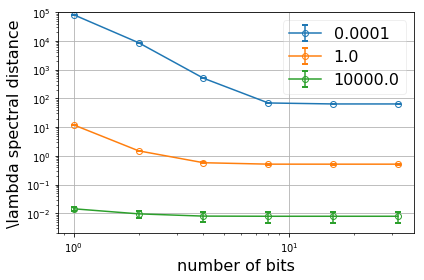

In [12]:
# lamb_list = ["0.0001", "0.001", "0.01", "0.1", "1.0", "10.0", "100.0", "1000.0", "10000.0"]
# lamb_list = ["0.0001", "0.001", "0.01", "0.1", "1.0", "10.0", "100.0", "1000.0", "10000.0"]
# lamb_list = ["0.001", "0.1", "10.0"]
lamb_list = ["0.0001", "1.0", "10000.0"]
# lamb_list = ["0.001", "1.0", "1000.0"]
nbit_list = [1, 2, 4, 8, 16, 32]
delta_dict = []
general_folder = "/dfs/scratch0/zjian/lp_kernel/fixed_design/theory_supporting_same_num_feature" 
color_dict = {}
for i, lamb in enumerate(lamb_list):
    folder_pattern = "census_type_cir_rff_l2_reg_" + lamb + "_n_feat_2000_nbit_unk_seed_unk"
    delta_list = get_results_for_one_lambda(nbit_list, general_folder, folder_pattern, seeds=[1,2,3,4,5])
#     label = "lambda=" + lamb
    label = lamb
    delta_dict.append( (label, nbit_list, deepcopy(delta_list) ) )
    color_dict[label] = colors[i]

save_csv_with_error_bar(delta_dict, file_name="./data_for_plot/theory_fixed_n_feat.csv")
plot_figure(delta_dict, color_dict)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("\lambda spectral distance", fontsize=16)
plt.xlabel("number of bits", fontsize=16)
# plt.title("delta vs memory")
plt.legend(fontsize=16, framealpha=0.3)
plt.ylim([None, 1e5])
plt.tight_layout()
plt.savefig("./figures/theory_fixed_n_feat.pdf")
plt.show()

### plot for fixed number of features with different regularizer values

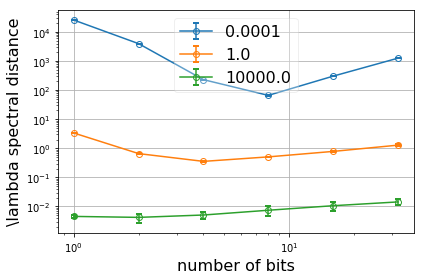

In [13]:
# lamb_list = ["1e-05", "0.0001", "0.001", "0.01", "0.1", "1.0", "10.0", "100.0", "1000.0", "10000.0"]
# lamb_list = ["0.001", "1.0", "1000.0"]
# lamb_list = ["0.001", "0.1", "10.0"]
lamb_list = ["0.0001", "1.0", "10000.0"]
nbit_list = [1, 2, 4, 8, 16, 32]
delta_dict = []
general_folder = "/dfs/scratch0/zjian/lp_kernel/fixed_design/theory_supporting_fixed_mem" 
color_dict = {}
for i, lamb in enumerate(lamb_list):
    folder_pattern = "census_type_cir_rff_l2_reg_" + lamb + "_n_feat_512_nbit_unk_seed_unk"
    delta_list = get_results_for_one_lambda(nbit_list, general_folder, folder_pattern, seeds=[1,2,3,4,5])
#     label = "lambda=" + lamb
    label = lamb
    delta_dict.append( (label, nbit_list, deepcopy(delta_list) ) )
    color_dict[label] = colors[i]
    
save_csv_with_error_bar(delta_dict, file_name="./data_for_plot/theory_fixed_memory.csv")
plot_figure(delta_dict, color_dict)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("\lambda spectral distance", fontsize=16)
plt.xlabel("number of bits", fontsize=16)
# plt.title("delta vs memory")
plt.legend(fontsize=16, framealpha=0.3)
# plt.ylim([None, 1e2])
plt.tight_layout()
plt.savefig("./figures/theory_fixed_memory.pdf")
plt.show()

['0.001']
maximum memory from cir rff 160768.0


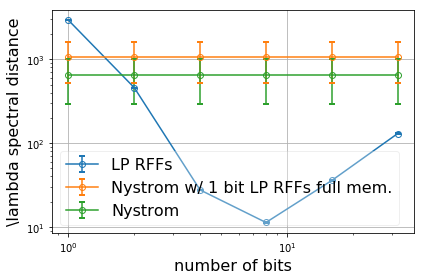

['1.0']
maximum memory from cir rff 160768.0


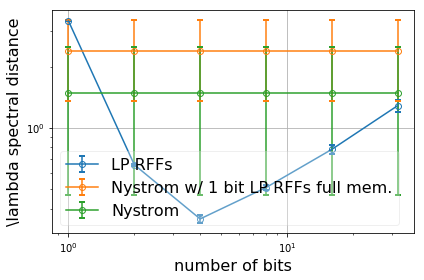

['10.0']
maximum memory from cir rff 160768.0


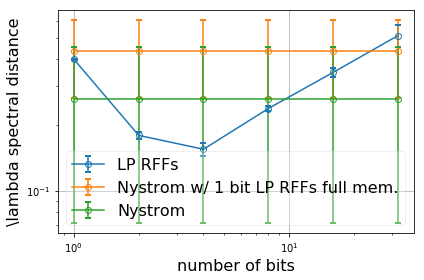

['100.0']
maximum memory from cir rff 160768.0


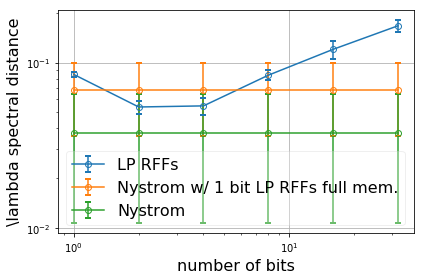

['1000.0']
maximum memory from cir rff 160768.0


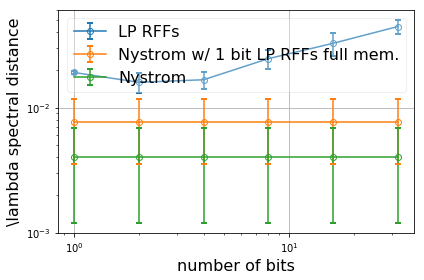

In [108]:
# lamb_list = ["1e-05", "0.0001", "0.001", "0.01", "0.1", "1.0", "10.0", "100.0", "1000.0", "10000.0"]
# lamb_list = ["0.001", "1.0", "1000.0"]
lamb_list_all = [ ["0.001"], ["1.0"], ["10.0"],["100.0"], ["1000.0"]]
nbit_list = [1, 2, 4, 8, 16, 32]

general_folder = "/dfs/scratch0/zjian/lp_kernel/fixed_design/theory_supporting_fixed_mem" 
for lamb_list in lamb_list_all:
    print lamb_list
    color_dict = {}
    delta_dict = []
    data_list = []
    for i, lamb in enumerate(lamb_list):
        folder_pattern = "census_type_cir_rff_l2_reg_" + lamb + "_n_feat_512_nbit_unk_seed_unk"
        delta_list = get_results_for_one_lambda(nbit_list, general_folder, folder_pattern, seeds=[1,2,3,4,5])
        label = "LP RFFs"
        delta_dict.append( (label, nbit_list, deepcopy(delta_list) ) )
        color_dict[label] = colors[i]

    m = 250
    r = 119
    c = 1
    cir_rff_mem_func = lambda n, b: get_cir_rff_memory_with_model(n, m, r, b, c)
    cir_rff_mem_max = cir_rff_mem_func(n=512 * 32, b=1.0)
    print "maximum memory from cir rff", cir_rff_mem_max
    "solve for x * 250 + x^2 + x* 119 + x=max mem budget, the solution is 257"
    general_folder = "/dfs/scratch0/zjian/lp_kernel/fixed_design/theory_supporting_fixed_mem" 
    for i, lamb in enumerate(lamb_list):
        folder_pattern = "census_type_nystrom_l2_reg_" + lamb + "_n_feat_257_fp_seed_unk"
        delta_list = get_results_for_one_lambda(nbit_list, general_folder, folder_pattern, seeds=[1,2,3,4,5])
        label = "Nystrom w/ 1 bit LP RFFs full mem."    
    #     print delta_list
        delta_dict.append( (label, nbit_list, deepcopy(delta_list) ) )
        color_dict[label] = colors[i + 1]

    m = 250
    r = 119
    c = 1
    cir_rff_mem_func = lambda n, b: get_cir_rff_memory_with_model(n, m, r, b, c)
    general_folder = "/dfs/scratch0/zjian/lp_kernel/fixed_design/theory_supporting_fixed_mem" 
    for i, lamb in enumerate(lamb_list):
        folder_pattern = "census_type_nystrom_l2_reg_" + lamb + "_n_feat_512_fp_seed_unk"
        delta_list = get_results_for_one_lambda(nbit_list, general_folder, folder_pattern, seeds=[1,2,3,4,5])
        label = "Nystrom"
        delta_dict.append( (label, nbit_list, deepcopy(delta_list) ) )
        color_dict[label] = colors[i + 2]

    plot_figure(delta_dict, color_dict)

    plt.yscale("log")
    plt.xscale("log")
    plt.ylabel("\lambda spectral distance", fontsize=16)
    plt.xlabel("number of bits", fontsize=16)
    # plt.title("delta vs memory")
    plt.legend(fontsize=16, framealpha=0.3)
    # plt.ylim([None, 1e2])
    plt.tight_layout()
    if lamb_list[0] == "0.001":
        plt.savefig("./figures/theory_fixed_memory_generous_mem_to_nystrom_lamb_0001.pdf")
    plt.show()

maximum memory from cir rff 160768.0


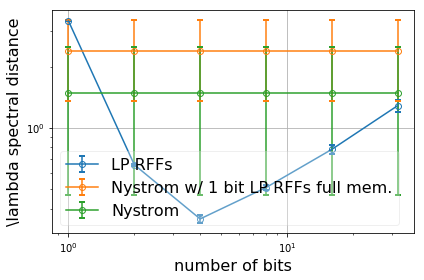

In [79]:
# lamb_list = ["1e-05", "0.0001", "0.001", "0.01", "0.1", "1.0", "10.0", "100.0", "1000.0", "10000.0"]
# lamb_list = ["0.001", "1.0", "1000.0"]
lamb_list = ["1.0"]
nbit_list = [1, 2, 4, 8, 16, 32]
delta_dict = []
general_folder = "/dfs/scratch0/zjian/lp_kernel/fixed_design/theory_supporting_fixed_mem" 
color_dict = {}
for i, lamb in enumerate(lamb_list):
    folder_pattern = "census_type_cir_rff_l2_reg_" + lamb + "_n_feat_512_nbit_unk_seed_unk"
    delta_list = get_results_for_one_lambda(nbit_list, general_folder, folder_pattern, seeds=[1,2,3,4,5])
    label = "LP RFFs"
    delta_dict.append( (label, nbit_list, deepcopy(delta_list) ) )
    color_dict[label] = colors[i]
    
m = 250
r = 119
c = 1
cir_rff_mem_func = lambda n, b: get_cir_rff_memory_with_model(n, m, r, b, c)
cir_rff_mem_max = cir_rff_mem_func(n=512 * 32, b=1.0)
print "maximum memory from cir rff", cir_rff_mem_max
"solve for x * 250 + x^2 + x* 119 + x=max mem budget, the solution is 257"
general_folder = "/dfs/scratch0/zjian/lp_kernel/fixed_design/theory_supporting_fixed_mem" 
for i, lamb in enumerate(lamb_list):
    folder_pattern = "census_type_nystrom_l2_reg_" + lamb + "_n_feat_257_fp_seed_unk"
    delta_list = get_results_for_one_lambda(nbit_list, general_folder, folder_pattern, seeds=[1,2,3,4,5])
    label = "Nystrom w/ 1 bit LP RFFs full mem."    
#     print delta_list
    delta_dict.append( (label, nbit_list, deepcopy(delta_list) ) )
    color_dict[label] = colors[i + 1]

m = 250
r = 119
c = 1
cir_rff_mem_func = lambda n, b: get_cir_rff_memory_with_model(n, m, r, b, c)
general_folder = "/dfs/scratch0/zjian/lp_kernel/fixed_design/theory_supporting_fixed_mem" 
for i, lamb in enumerate(lamb_list):
    folder_pattern = "census_type_nystrom_l2_reg_" + lamb + "_n_feat_512_fp_seed_unk"
    delta_list = get_results_for_one_lambda(nbit_list, general_folder, folder_pattern, seeds=[1,2,3,4,5])
    label = "Nystrom"
    delta_dict.append( (label, nbit_list, deepcopy(delta_list) ) )
    color_dict[label] = colors[i + 2]
    
plot_figure(delta_dict, color_dict)
    
plt.yscale("log")
plt.xscale("log")
plt.ylabel("\lambda spectral distance", fontsize=16)
plt.xlabel("number of bits", fontsize=16)
# plt.title("delta vs memory")
plt.legend(fontsize=16, framealpha=0.3)
# plt.ylim([None, 1e2])
plt.tight_layout()
plt.savefig("./figures/theory_fixed_memory_generous_mem_to_nystrom_lamb_1.pdf")
plt.show()

maximum memory from cir rff 160768.0


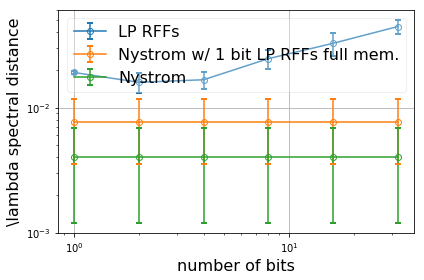

In [77]:
# lamb_list = ["1e-05", "0.0001", "0.001", "0.01", "0.1", "1.0", "10.0", "100.0", "1000.0", "10000.0"]
# lamb_list = ["0.001", "1.0", "1000.0"]
lamb_list = ["1000.0"]
nbit_list = [1, 2, 4, 8, 16, 32]
delta_dict = []
general_folder = "/dfs/scratch0/zjian/lp_kernel/fixed_design/theory_supporting_fixed_mem" 
color_dict = {}
for i, lamb in enumerate(lamb_list):
    folder_pattern = "census_type_cir_rff_l2_reg_" + lamb + "_n_feat_512_nbit_unk_seed_unk"
    delta_list = get_results_for_one_lambda(nbit_list, general_folder, folder_pattern, seeds=[1,2,3,4,5])
    label = "LP RFFs"
    delta_dict.append( (label, nbit_list, deepcopy(delta_list) ) )
    color_dict[label] = colors[i]
    
m = 250
r = 119
c = 1
cir_rff_mem_func = lambda n, b: get_cir_rff_memory_with_model(n, m, r, b, c)
cir_rff_mem_max = cir_rff_mem_func(n=512 * 32, b=1.0)
print "maximum memory from cir rff", cir_rff_mem_max
"solve for x * 250 + x^2 + x* 119 + x=max mem budget, the solution is 257"
general_folder = "/dfs/scratch0/zjian/lp_kernel/fixed_design/theory_supporting_fixed_mem" 
for i, lamb in enumerate(lamb_list):
    folder_pattern = "census_type_nystrom_l2_reg_" + lamb + "_n_feat_257_fp_seed_unk"
    delta_list = get_results_for_one_lambda(nbit_list, general_folder, folder_pattern, seeds=[1,2,3,4,5])
    label = "Nystrom w/ 1 bit LP RFFs full mem."    
#     print delta_list
    delta_dict.append( (label, nbit_list, deepcopy(delta_list) ) )
    color_dict[label] = colors[i + 1]

m = 250
r = 119
c = 1
cir_rff_mem_func = lambda n, b: get_cir_rff_memory_with_model(n, m, r, b, c)
general_folder = "/dfs/scratch0/zjian/lp_kernel/fixed_design/theory_supporting_fixed_mem" 
for i, lamb in enumerate(lamb_list):
    folder_pattern = "census_type_nystrom_l2_reg_" + lamb + "_n_feat_512_fp_seed_unk"
    delta_list = get_results_for_one_lambda(nbit_list, general_folder, folder_pattern, seeds=[1,2,3,4,5])
    label = "Nystrom"
    delta_dict.append( (label, nbit_list, deepcopy(delta_list) ) )
    color_dict[label] = colors[i + 2]
    
plot_figure(delta_dict, color_dict)
    
plt.yscale("log")
plt.xscale("log")
plt.ylabel("\lambda spectral distance", fontsize=16)
plt.xlabel("number of bits", fontsize=16)
# plt.title("delta vs memory")
plt.legend(fontsize=16, framealpha=0.3)
# plt.ylim([None, 1e2])
plt.tight_layout()
plt.savefig("./figures/theory_fixed_memory_generous_mem_to_nystrom_lamb_1000.0.pdf")
plt.show()

maximum memory from cir rff 160768.0


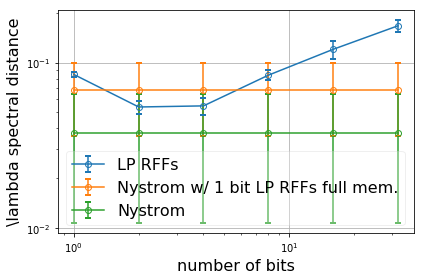

In [78]:
# lamb_list = ["1e-05", "0.0001", "0.001", "0.01", "0.1", "1.0", "10.0", "100.0", "1000.0", "10000.0"]
# lamb_list = ["0.001", "1.0", "1000.0"]
lamb_list = ["100.0"]
nbit_list = [1, 2, 4, 8, 16, 32]
delta_dict = []
general_folder = "/dfs/scratch0/zjian/lp_kernel/fixed_design/theory_supporting_fixed_mem" 
color_dict = {}
for i, lamb in enumerate(lamb_list):
    folder_pattern = "census_type_cir_rff_l2_reg_" + lamb + "_n_feat_512_nbit_unk_seed_unk"
    delta_list = get_results_for_one_lambda(nbit_list, general_folder, folder_pattern, seeds=[1,2,3,4,5])
    label = "LP RFFs"
    delta_dict.append( (label, nbit_list, deepcopy(delta_list) ) )
    color_dict[label] = colors[i]
    
m = 250
r = 119
c = 1
cir_rff_mem_func = lambda n, b: get_cir_rff_memory_with_model(n, m, r, b, c)
cir_rff_mem_max = cir_rff_mem_func(n=512 * 32, b=1.0)
print "maximum memory from cir rff", cir_rff_mem_max
"solve for x * 250 + x^2 + x* 119 + x=max mem budget, the solution is 257"
general_folder = "/dfs/scratch0/zjian/lp_kernel/fixed_design/theory_supporting_fixed_mem" 
for i, lamb in enumerate(lamb_list):
    folder_pattern = "census_type_nystrom_l2_reg_" + lamb + "_n_feat_257_fp_seed_unk"
    delta_list = get_results_for_one_lambda(nbit_list, general_folder, folder_pattern, seeds=[1,2,3,4,5])
    label = "Nystrom w/ 1 bit LP RFFs full mem."    
#     print delta_list
    delta_dict.append( (label, nbit_list, deepcopy(delta_list) ) )
    color_dict[label] = colors[i + 1]

m = 250
r = 119
c = 1
cir_rff_mem_func = lambda n, b: get_cir_rff_memory_with_model(n, m, r, b, c)
general_folder = "/dfs/scratch0/zjian/lp_kernel/fixed_design/theory_supporting_fixed_mem" 
for i, lamb in enumerate(lamb_list):
    folder_pattern = "census_type_nystrom_l2_reg_" + lamb + "_n_feat_512_fp_seed_unk"
    delta_list = get_results_for_one_lambda(nbit_list, general_folder, folder_pattern, seeds=[1,2,3,4,5])
    label = "Nystrom"
    delta_dict.append( (label, nbit_list, deepcopy(delta_list) ) )
    color_dict[label] = colors[i + 2]
    
plot_figure(delta_dict, color_dict)
    
plt.yscale("log")
plt.xscale("log")
plt.ylabel("\lambda spectral distance", fontsize=16)
plt.xlabel("number of bits", fontsize=16)
# plt.title("delta vs memory")
plt.legend(fontsize=16, framealpha=0.3)
# plt.ylim([None, 1e2])
plt.tight_layout()
plt.savefig("./figures/theory_fixed_memory_generous_mem_to_nystrom_lamb_100.0.pdf")
plt.show()